## hello AirPassengers

In [3]:
import polars as pl

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [4]:
path = "data/airpassengers/airpassengers.csv"

In [5]:
df = pl.read_csv(path).with_columns(pl.col("Month").str.to_date("%Y-%m"))
df

Month,#Passengers
date,i64
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
…,…
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
df.plot.line(x="Month", y="#Passengers")

alt.Chart(...)

In [8]:
import seaborn as sns

<Axes: xlabel='Month', ylabel='#Passengers'>

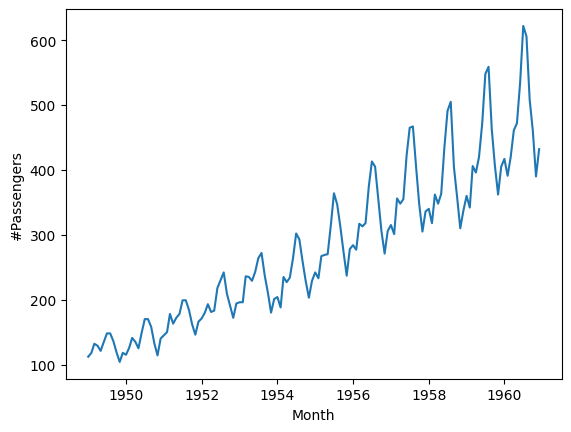

In [23]:
sns.lineplot(x="Month", y="#Passengers", data=df)

## hello nixtla

In [11]:
from statforecast import generate_series

ModuleNotFoundError: No module named 'statforecast'

In [10]:
import mlforecast

## foundational models

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
nixtla_api_key = os.getenv("NIXTLA_API_KEY")

In [3]:
import pandas as pd
from nixtla import NixtlaClient

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


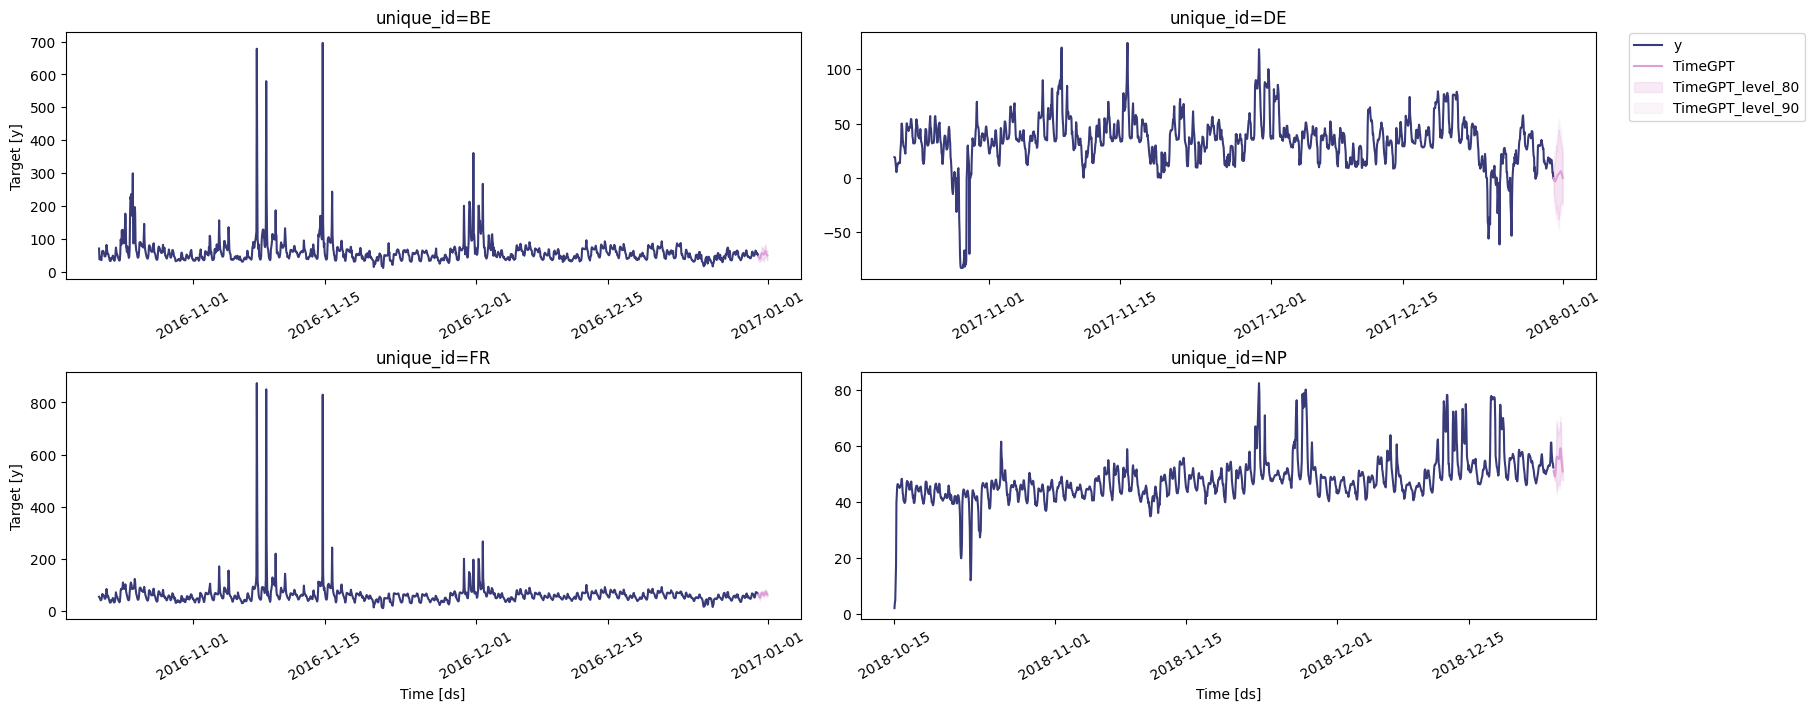

In [4]:
nixtla_client = NixtlaClient(api_key = nixtla_api_key)
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
fcst_df = nixtla_client.forecast(df, h=24, level=[80, 90])
nixtla_client.plot(df, fcst_df, level=[80, 90])